<a href="https://colab.research.google.com/github/dinithprimal/SemanticCommunication/blob/main/Merge_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

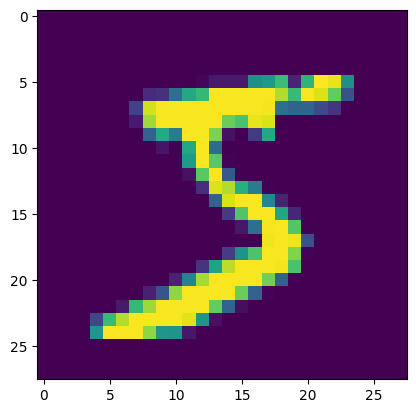

In [ ]:
plt.imshow(X_train[0])

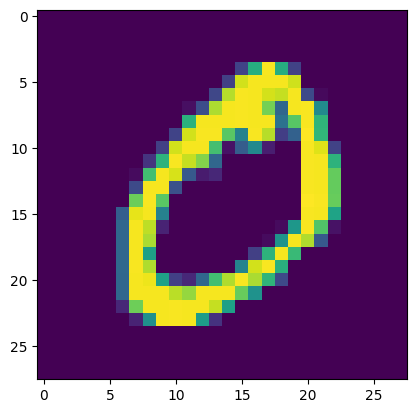

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [ ]:
X_train[0]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

## Encoder

In [ ]:
# Input Layer
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoder_flatten = keras.layers.Flatten()(encoder_input)

# Hidden Layers
encoder_hidden01 = keras.layers.Dense(256, activation='relu')(encoder_flatten)
encoder_hidden02 = keras.layers.Dense(128, activation='relu')(encoder_hidden01)
encoder_hidden03 = keras.layers.Dense(64, activation='relu')(encoder_hidden02)

# Output Layer
encoder_output = keras.layers.Dense(16, activation='relu')(encoder_hidden03)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

## Decoder

In [ ]:
# Input Layer
decoder_input = keras.layers.Dense(16, activation='relu')(encoder_output)

# Hidden Layers
decoder_hidden01 = keras.layers.Dense(64, activation='relu')(decoder_input)
decoder_hidden02 = keras.layers.Dense(128, activation='relu')(decoder_hidden01)
decoder_hidden03 = keras.layers.Dense(256, activation='relu')(decoder_hidden02)
decoder_hidden04 = keras.layers.Dense(784, activation='sigmoid')(decoder_hidden03)


# Output Layer
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_hidden04)

decoder = keras.Model(encoder_output, decoder_output, name='decoder')

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 16)                

In [ ]:
autoencoder.compile(opt, loss='mse')

In [ ]:
autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 19s 5ms/step - loss: 0.0372 - val_loss: 0.0253
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0237 - val_loss: 0.0215
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0207 - val_loss: 0.0190
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0181 - val_loss: 0.0173
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0167 - val_loss: 0.0160


In [ ]:
X_test[0].shape

(28, 28)

In [ ]:
ne_X = X_test[0].reshape(-1, 28, 28, 1)
ne_X.shape

(1, 28, 28, 1)

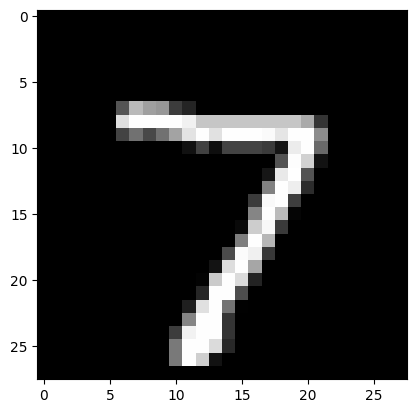

In [ ]:
plt.imshow(X_test[0], cmap='gray')

In [ ]:
example = encoder.predict([X_test[0].reshape(-1, 28, 28, 1)])[0]

print(example)

1/1 [==============================] - 0s 87ms/step
[20.398245   8.6918125  0.         6.779334  15.226566  11.654301
 29.460396  11.625238   9.832648   0.         0.         5.974622
 17.615843  16.816238   5.3710403  9.306801 ]


In [ ]:
example.shape

(16,)

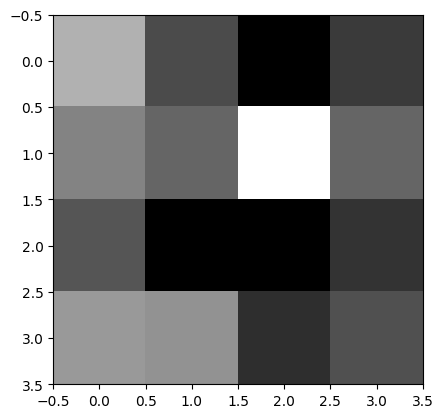

In [ ]:
plt.imshow(example.reshape((4,4)), cmap='gray')

In [ ]:
output = autoencoder.predict([X_test[0].reshape(-1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 98ms/step


In [ ]:
output.shape

(28, 28, 1)

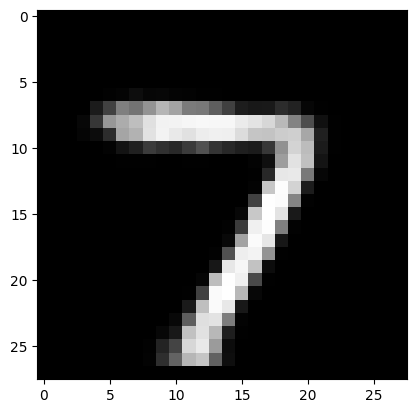

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
Total params: 243152 (949.81 KB)
Trainable params: 243152 (

In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0   

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 16)                

In [ ]:
out = decoder.predict([example.reshape(-1,16)])

1/1 [==============================] - 0s 75ms/step


In [ ]:
out.shape

(1, 28, 28, 1)

In [ ]:
a = out.reshape(28, 28, 1)
a.shape

(28, 28, 1)

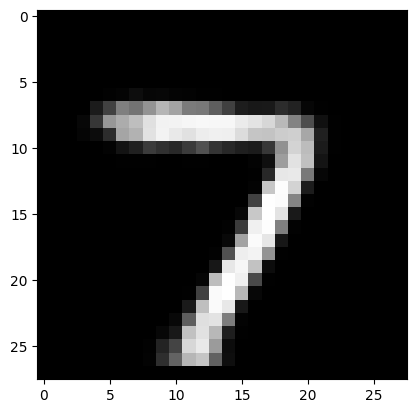

In [ ]:
plt.imshow(a, cmap='gray')

In [ ]:
example2 = encoder.predict([X_test[1].reshape(-1, 28, 28, 1)])[0]

print(example2)

1/1 [==============================] - 0s 17ms/step
[ 5.679587   6.0730553  0.         6.8555975  1.1022346 14.917292
 13.954569   6.118423   4.283692   0.         0.        14.15526
  3.152389   2.0220284  6.9748607  6.4527273]


In [ ]:
out2 = decoder.predict([example2.reshape(-1,16)])

1/1 [==============================] - 0s 16ms/step


In [ ]:
a2 = out2.reshape(28, 28)
a2.shape

(28, 28)

In [ ]:
print(a2)

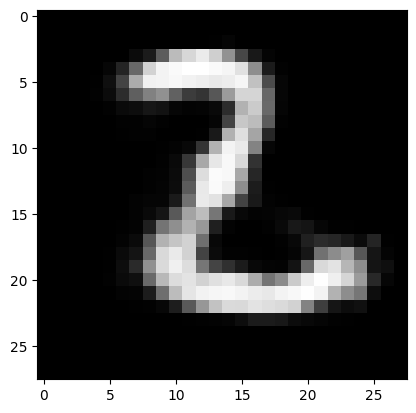

In [ ]:
plt.imshow(a2, cmap='gray')

In [ ]:
X_test[1].shape

(28, 28)

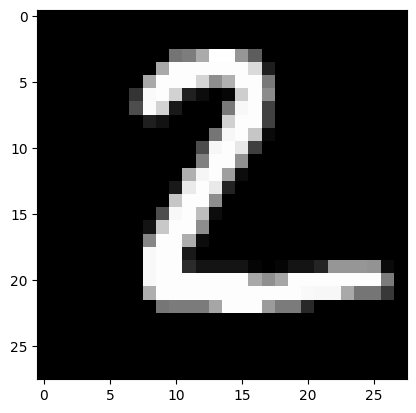

In [ ]:
plt.imshow(X_test[1], cmap='gray')